# Import libraries

In [463]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [464]:
# read and display data

**Importing Dataset**

In [465]:
data = pd.read_csv("dataset/OnlineNewsPopularity.csv")
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [466]:
# columns of the dataset:

In [467]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [468]:
data.columns[:10]

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs'],
      dtype='object')

In [469]:
data.rename(columns=lambda x: x.replace(' ', ''), inplace=True)
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [470]:
data_copy = data.copy()

In [471]:
data.shape

(39644, 61)

In [472]:
# No duplicates found :

In [473]:
data=data.drop_duplicates()
data.shape

(39644, 61)

In [474]:
has_nan = data.isna().any().any()
if has_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain any NaN values.")

The DataFrame does not contain any NaN values.


In [475]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [476]:
# Remove :URL and timedelta columns as they are meta-data and should not be treated as features.

In [477]:
try:
    data.drop(labels=['url', 'timedelta'], axis = 1, inplace=True)
except:
    pass
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [478]:
num_of_nowords=data[data['n_tokens_title']==0].index
print('number of news Titles with no words',num_of_nowords.size)

number of news Titles with no words 0


In [479]:
# Verifying whether there are columns containing only one unique value, as they will have no impact on our analysis.

In [480]:
data.nunique(dropna=True)

n_tokens_title                      20
n_tokens_content                  2406
n_unique_tokens                  27281
n_non_stop_words                  1451
n_non_stop_unique_tokens         22930
num_hrefs                          133
num_self_hrefs                      59
num_imgs                            91
num_videos                          53
average_token_length             30136
num_keywords                        10
data_channel_is_lifestyle            2
data_channel_is_entertainment        2
data_channel_is_bus                  2
data_channel_is_socmed               2
data_channel_is_tech                 2
data_channel_is_world                2
kw_min_min                          26
kw_max_min                        1076
kw_avg_min                       17003
kw_min_max                        1021
kw_max_max                          35
kw_avg_max                       30834
kw_min_avg                       15982
kw_max_avg                       19438
kw_avg_avg               

In [481]:
# No unique values found

In [482]:
num_of_nowords=data[data['n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)

number of news items with no words 1181


In [483]:
# Drop items with n_tokens_content = 0
# data = data[data['n_tokens_content'] != 0]

In [484]:
bi_value_cols = data.loc[:,data.nunique()==2].columns
multi_value_cols = data.drop(labels=bi_value_cols,axis=1).columns
print(bi_value_cols)
print(multi_value_cols)

Index(['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend'],
      dtype='object')
Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'g

In [485]:
data['n_tokens_title']

0        12.0
1         9.0
2         9.0
3         9.0
4        13.0
         ... 
39639    11.0
39640    12.0
39641    10.0
39642     6.0
39643    10.0
Name: n_tokens_title, Length: 39644, dtype: float64

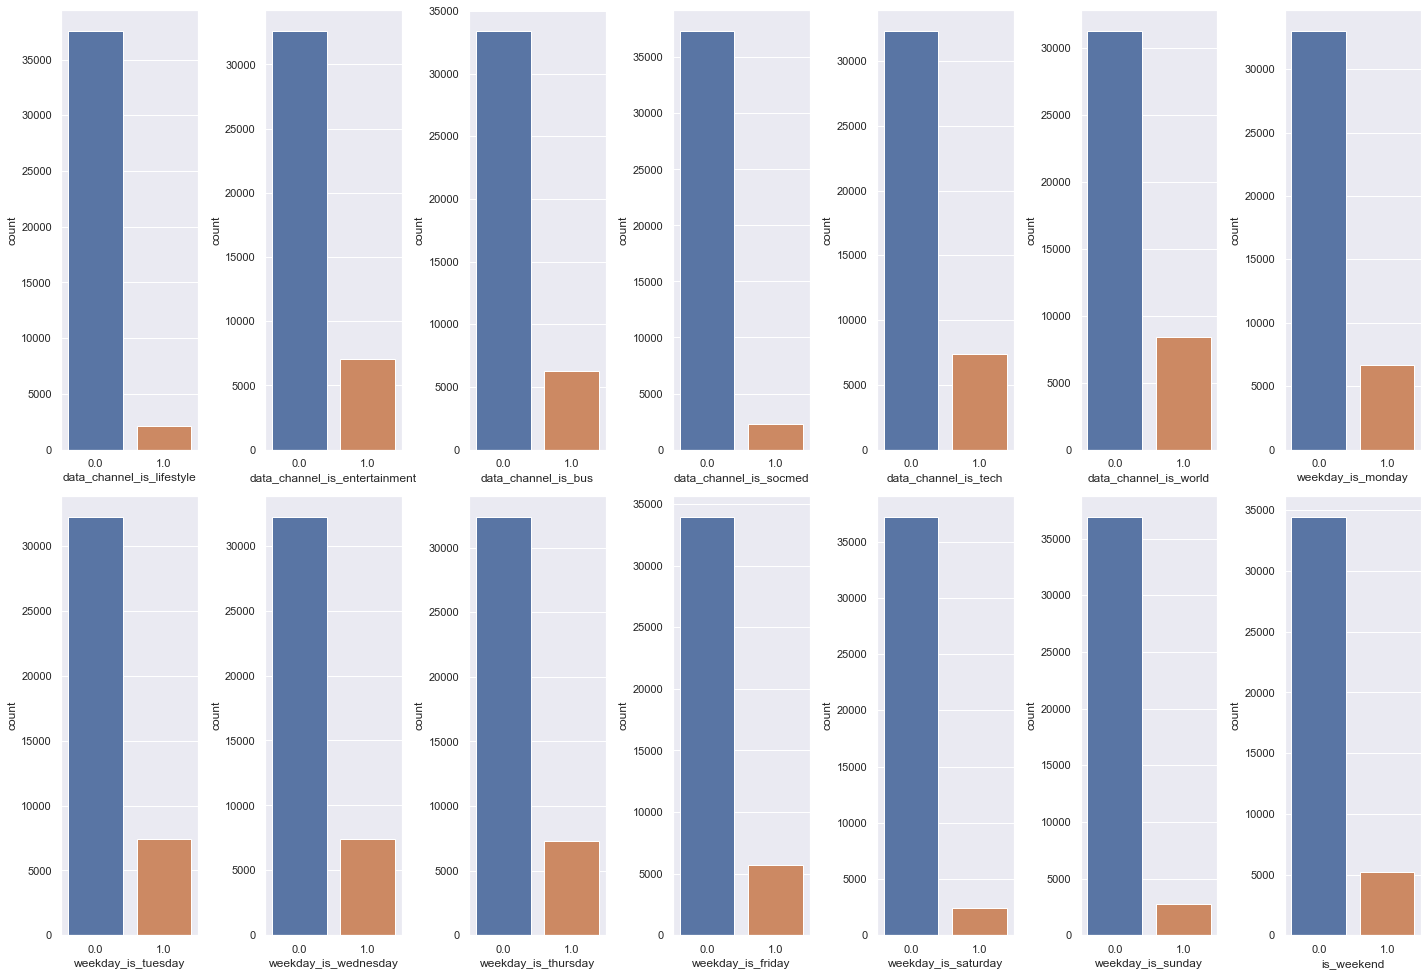

In [486]:
n=1
k=round(len(bi_value_cols)/7)+1

plt.figure(figsize=(20,20))
for i in bi_value_cols:
    plt.subplot(k,7,n)
    sns.countplot(x=i,data=data)
    n+=1

plt.tight_layout()
plt.show()

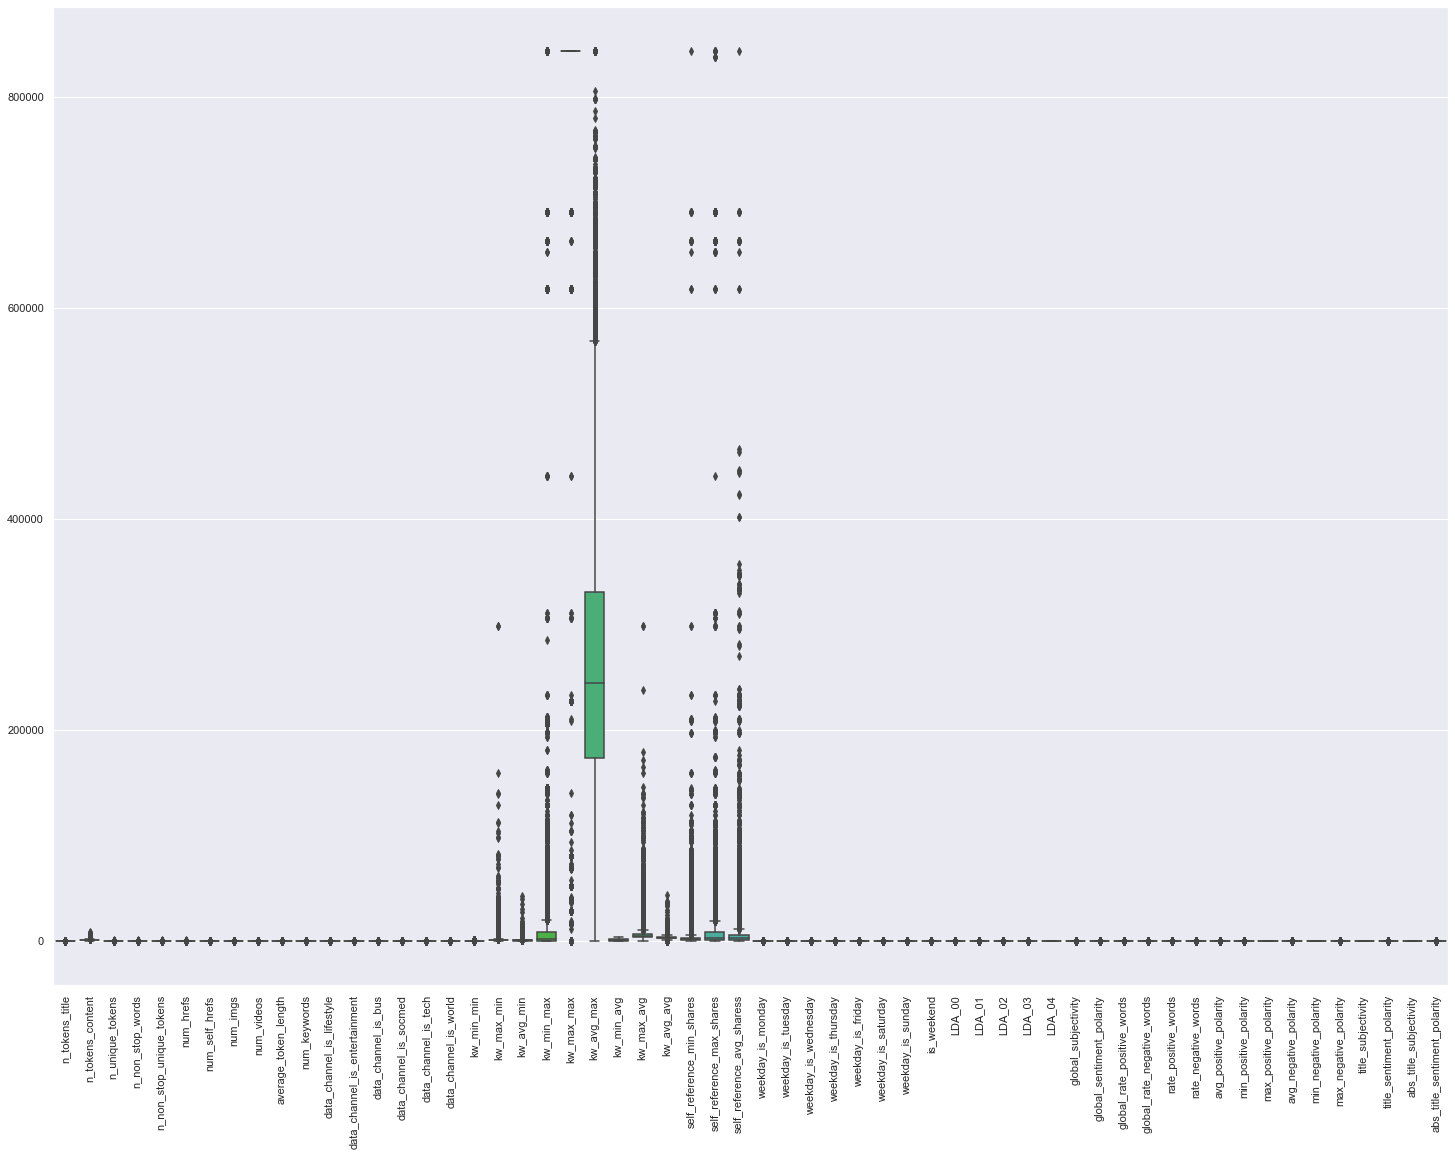

In [487]:
plt.figure(figsize=(25,18))
plt.xticks(rotation =90)
sns.boxplot(data = data.drop(labels=['shares'],axis = 1))
plt.show()

In [488]:
tmp_unique_multi = []
for i in multi_value_cols[:-1]:
    tmp_unique_multi.append(len(set(data[i])))
print(tmp_unique_multi)

[20, 2406, 27281, 1451, 22930, 133, 59, 91, 53, 30136, 10, 26, 1076, 17003, 1021, 35, 30834, 15982, 19438, 39300, 1255, 1137, 8626, 39337, 39098, 39525, 38963, 39370, 34501, 34695, 13159, 10271, 2284, 2284, 27301, 33, 38, 13841, 54, 49, 673, 813, 532, 653]


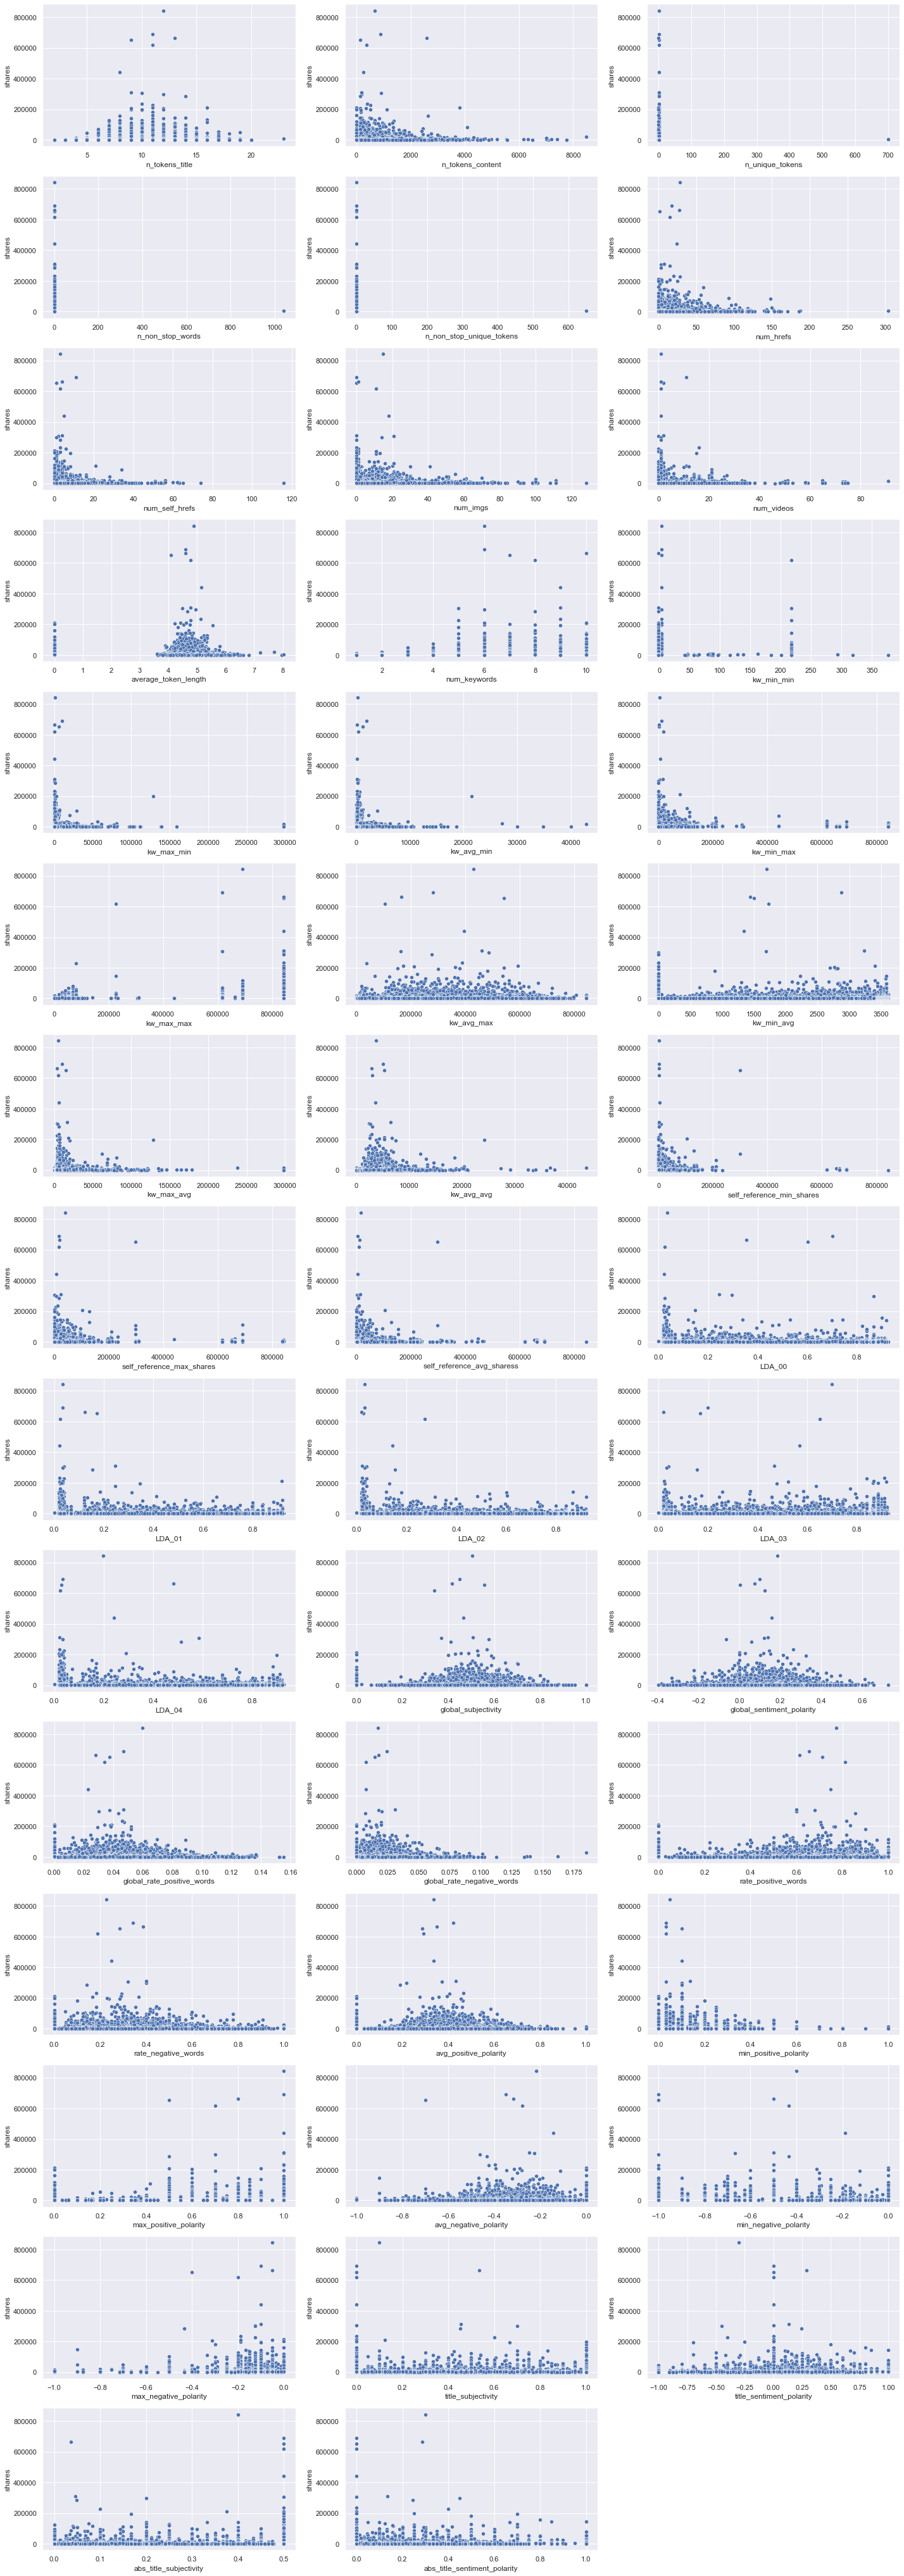

In [489]:
n=1
k=round(len(multi_value_cols)/3)+1

plt.figure(figsize=(20,60))
for i in multi_value_cols[:-1]:
    plt.subplot(k,3,n)
    sns.scatterplot(y=data["shares"], x=data[i])
    n+=1

plt.tight_layout()
plt.show()

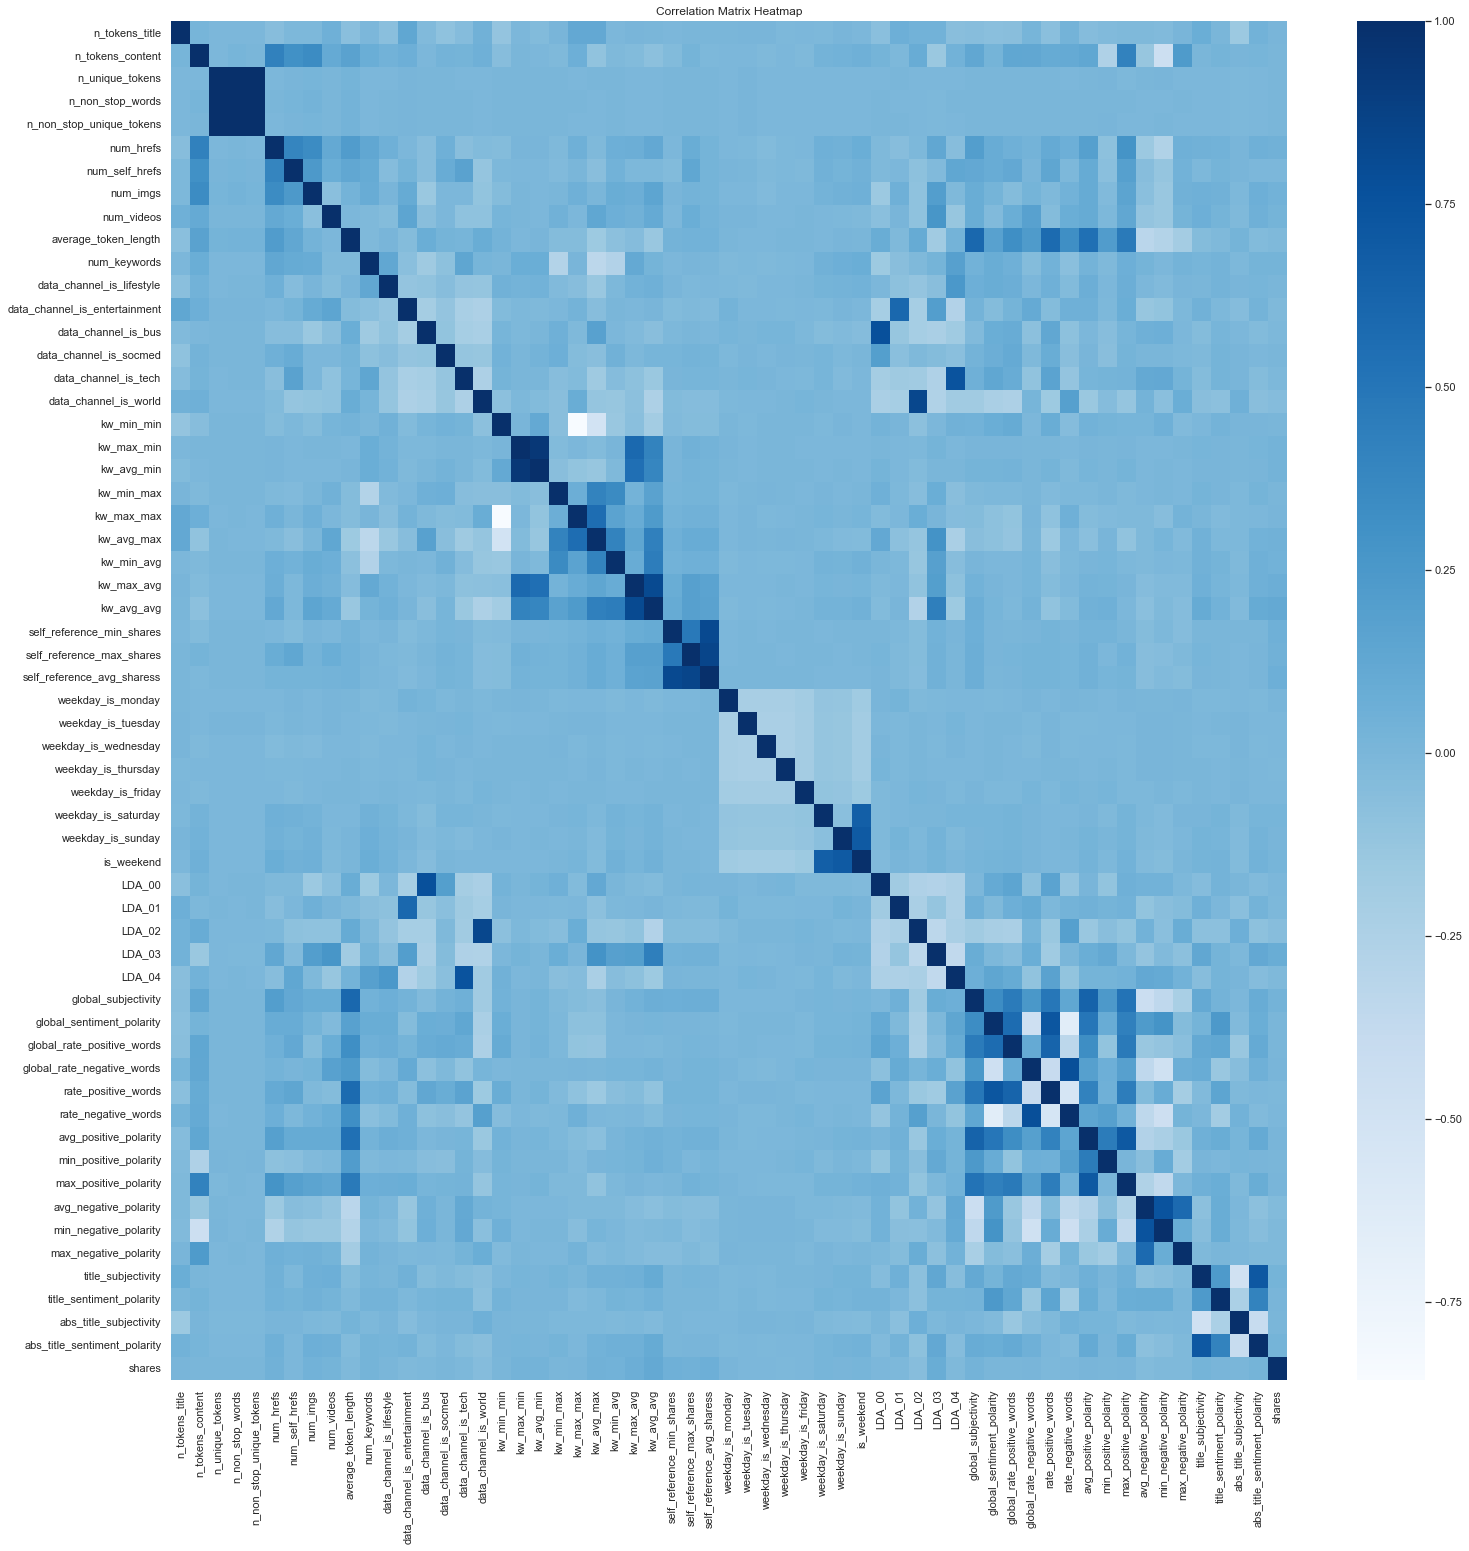

In [490]:
cor=data.corr()
plt.figure(figsize=(25,25))
sns.heatmap(cor, cmap='Blues')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [491]:
cor = data.corr()
# Convert the correlation matrix into a Series
cor_series = cor.unstack()
# Sort the correlation values in descending order
sorted_cor = cor_series.sort_values(ascending=False)
# Filter out the pairs with perfect correlation (correlation of 1) and self-correlations
sorted_cor = sorted_cor[(sorted_cor < 1) & (sorted_cor > -1)]
sorted_cor[:40:2]

n_non_stop_unique_tokens   n_unique_tokens                  0.999852
n_non_stop_words           n_unique_tokens                  0.999572
n_non_stop_unique_tokens   n_non_stop_words                 0.999532
kw_avg_min                 kw_max_min                       0.940529
self_reference_max_shares  self_reference_avg_sharess       0.853480
LDA_02                     data_channel_is_world            0.836618
self_reference_min_shares  self_reference_avg_sharess       0.818907
kw_avg_avg                 kw_max_avg                       0.811864
rate_negative_words        global_rate_negative_words       0.779556
LDA_00                     data_channel_is_bus              0.774651
data_channel_is_tech       LDA_04                           0.749737
min_negative_polarity      avg_negative_polarity            0.748896
rate_positive_words        global_sentiment_polarity        0.727827
title_subjectivity         abs_title_sentiment_polarity     0.714528
avg_positive_polarity      max_pos

In [492]:
print(data['n_non_stop_words'].describe())

count    39644.000000
mean         0.996469
std          5.231231
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name: n_non_stop_words, dtype: float64


In [493]:
# Remove "n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"

In [494]:
# try:
#     data.drop(labels=['n_non_stop_unique_tokens', 'n_non_stop_words','kw_avg_min'], axis = 1, inplace=True)
# except:
#     pass
# data.head()

In [495]:
data['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

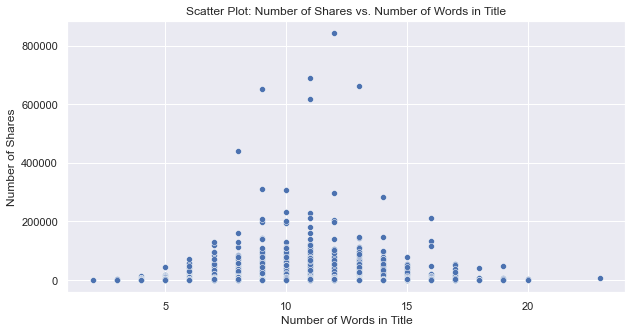

In [496]:
plt.figure(figsize=(10, 5))

# Create the scatter plot
ax = sns.scatterplot(y='shares', x='n_tokens_title', data=data)

# Customize the plot if needed (optional)
# For example, you can set x and y-axis labels and a title:
ax.set_xlabel("Number of Words in Title")
ax.set_ylabel("Number of Shares")
plt.title("Scatter Plot: Number of Shares vs. Number of Words in Title")

# Show the plot
plt.show()

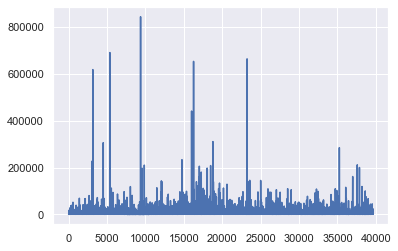

In [497]:
plt.plot(data['shares'])

Text(0, 0.5, 'Frequency')

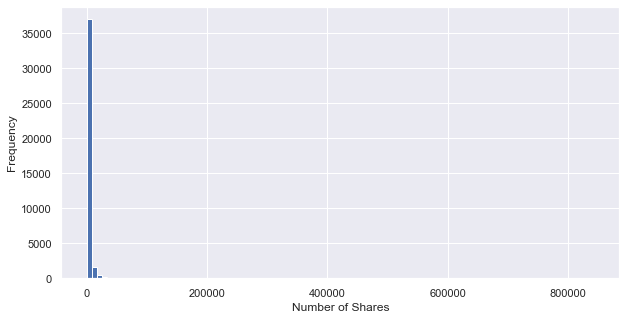

In [498]:
plt.figure(figsize=(10, 5))
plt.hist(data['shares'],bins=100)
plt.xlabel("Number of Shares")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

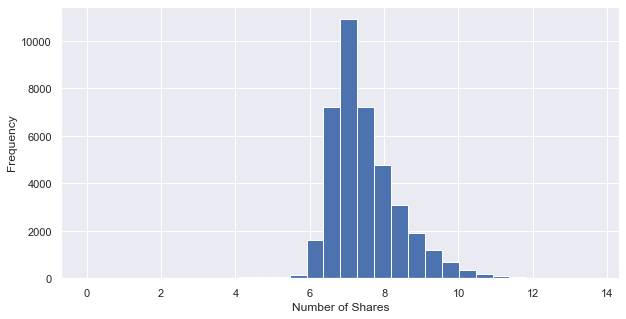

In [499]:
plt.figure(figsize=(10, 5))
plt.hist(np.log(data['shares']),bins=30)
plt.xlabel("Number of Shares")
plt.ylabel("Frequency")

In [500]:
X = data.drop(labels=['shares'],axis = 1)
y=data['shares']

In [501]:
X['total_visual'] = X['num_imgs']+X['num_videos']

In [502]:
from sklearn.model_selection import train_test_split

In [503]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(27750, 59) (27750,)
(11894, 59) (11894,)


In [504]:
# Clip the values at 99 and 1 percentile as there are highly skewed outliers

In [505]:
X_train_cap = X_train.copy()
X_test_cap = X_test.copy()

for col in X_train_cap.columns:
    percentiles_1_99 = X_train_cap[col].quantile([0.01,0.99]).values
    X_train_cap[col] = np.clip(X_train_cap[col], percentiles_1_99[0], percentiles_1_99[1])
    
for col in X_test_cap.columns:
    percentiles_1_99 = X_test_cap[col].quantile([0.01,0.99]).values
    X_test_cap[col] = np.clip(X_test_cap[col], percentiles_1_99[0], percentiles_1_99[1])

In [509]:
bi_value_cols = X.loc[:,X.nunique()==2].columns
multi_value_cols = X.drop(labels=bi_value_cols,axis=1).columns
# print(bi_value_cols)
# print(multi_value_cols)

In [ ]:
# Compare and see the outliers now:

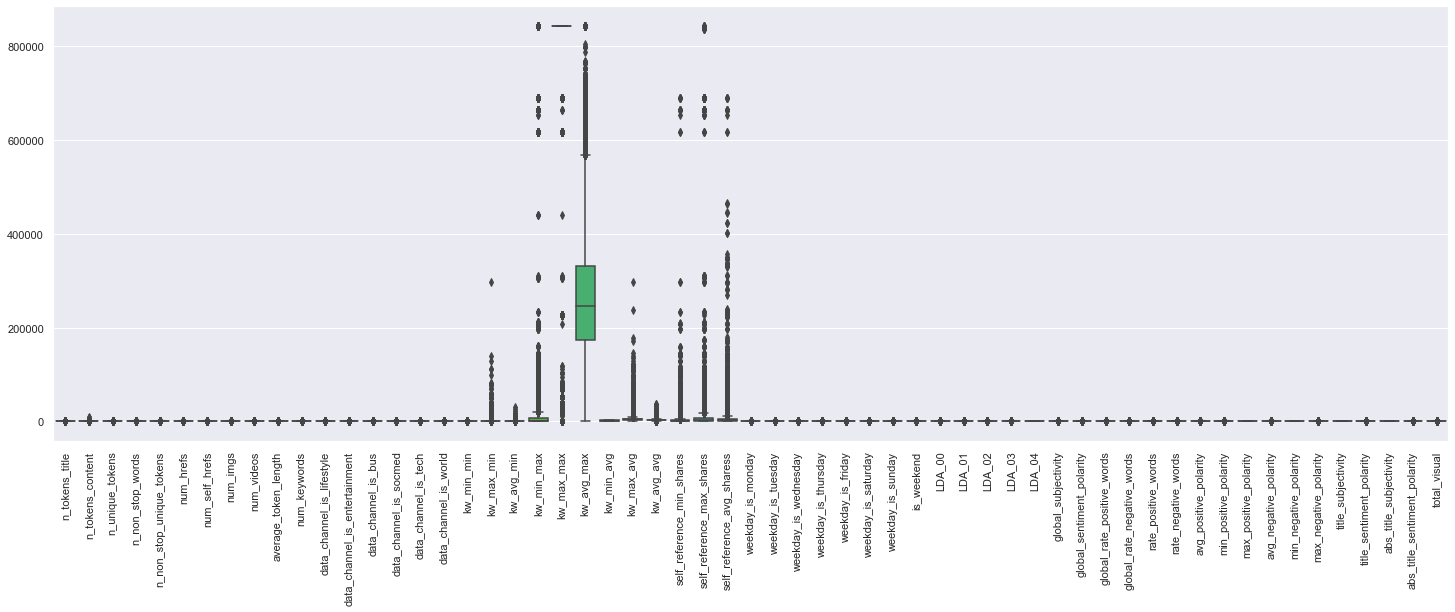

In [512]:
plt.figure(figsize=(25,8))
plt.xticks(rotation =90)
sns.boxplot(data = X_train)
plt.show()

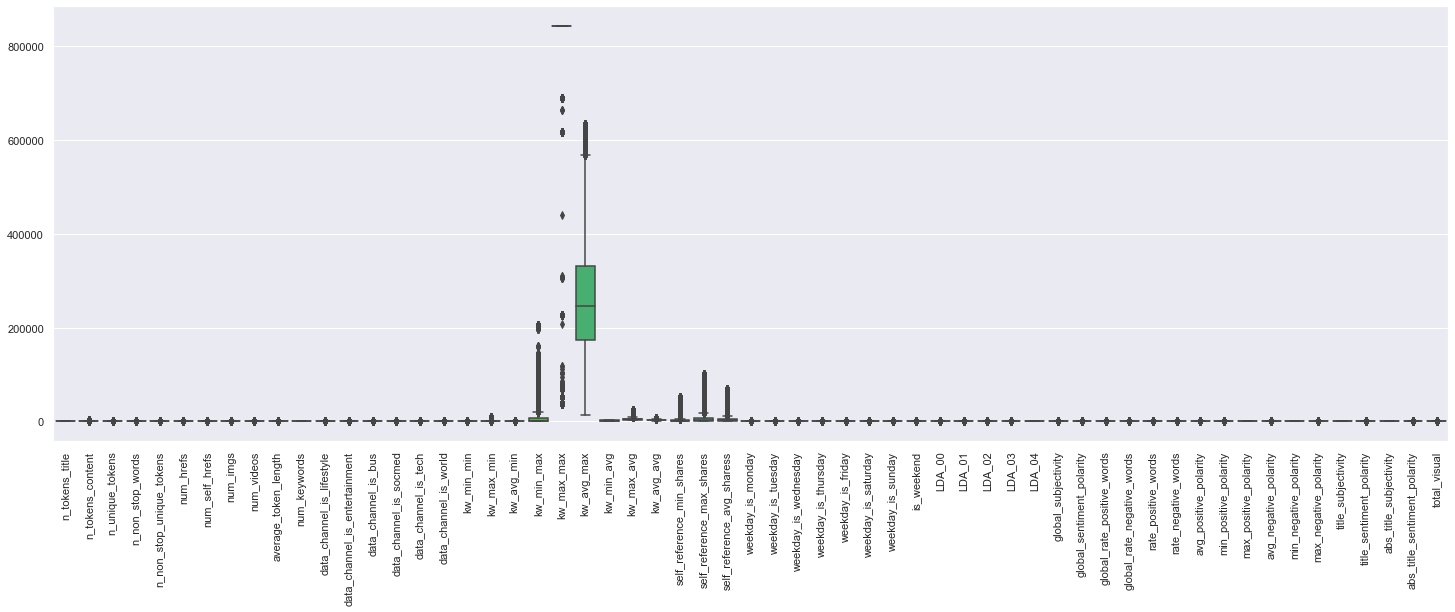

In [513]:
plt.figure(figsize=(25,8))
plt.xticks(rotation =90)
sns.boxplot(data = X_train_cap)
plt.show()

In [514]:
from sklearn.impute import SimpleImputer

from sklearn import metrics
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso, Ridge
# from catboost import CatBoostRegressor
# from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

sc = StandardScaler()

In [515]:
# Creating pipelines for column tranformer

In [516]:
bi_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent'))])

multi_transformer = Pipeline(steps=[('imputer_m',SimpleImputer(strategy='median')),('scaler',sc)])

# Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('bi',bi_transformer,bi_value_cols),
        ('multi',multi_transformer,multi_value_cols)
    ])

In [517]:
def regression_results(y_test, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
    r2=metrics.r2_score(y_test, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [518]:
pca = PCA(0.90)
poly2 = PolynomialFeatures(degree=2)
poly3 = PolynomialFeatures(degree=4)

In [519]:
lr = LinearRegression()

In [520]:
# Linear Regression

In [528]:
# Creating pipeline
pipe_lr = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
#             ('sc',sc),
          ('pca',pca),
          ('model_lr',lr)
    ])

# Fitting data
pipe_lr.fit(X_train_cap,y_train)

# Predicting using pipe
train_pred = pipe_lr.predict(X_train_cap)
test_pred = pipe_lr.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  0.0199
r2:  0.0199
MAE:  3138.9284
MSE:  160578881.8976
RMSE:  12671.9723

 Test metrics
explained_variance:  0.0299
r2:  0.0295
MAE:  2995.504
MSE:  66266911.2578
RMSE:  8140.4491


In [529]:
# Creating pipeline
pipe_lr = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('pca',pca),
        ('poly',poly2),
        ('model_lr',lr)
    ])

# Fitting data
pipe_lr.fit(X_train_cap,y_train)

# Predicting using pipe
train_pred = pipe_lr.predict(X_train_cap)
test_pred = pipe_lr.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  0.0419
r2:  0.0419
MAE:  3282.8342
MSE:  156983932.2804
RMSE:  12529.3229

 Test metrics
explained_variance:  -0.0016
r2:  -0.0019
MAE:  3181.6781
MSE:  68411126.7418
RMSE:  8271.1019


In [295]:
# Creating pipeline
pipe_lr = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('pca',pca),
        ('poly',poly3),
        ('model_lr',lr)
    ])

# Fitting data
pipe_lr.fit(X_train_cap,y_train)

# Predicting using pipe
train_pred = pipe_lr.predict(X_train_cap)
test_pred = pipe_lr.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

MemoryError: Unable to allocate 5.50 GiB for an array with shape (26924, 27405) and data type float64

In [334]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')

In [335]:
# Creating pipeline
pipe_lr = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('pca',pca),
        ('svr',svr),
    ])

# Fitting data
pipe_lr.fit(X_train_cap,y_train)

# Predicting using pipe
train_pred = pipe_lr.predict(X_train_cap)
test_pred = pipe_lr.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  0.0025
r2:  -0.0277
MAE:  2412.9754
MSE:  128698014.0992
RMSE:  11344.5147

 Test metrics
explained_variance:  0.002
r2:  -0.0198
MAE:  2309.61
MSE:  158296202.9481
RMSE:  12581.5819


In [530]:
from sklearn.tree import DecisionTreeRegressor
decisionTreeRegressor = DecisionTreeRegressor(random_state = 0)

In [531]:
# Creating pipeline
pipe_lr = Pipeline(
    steps=[
        ('decisionTreeRegressor',decisionTreeRegressor),
    ])

# Fitting data
pipe_lr.fit(X_train_cap,y_train)

# Predicting using pipe
train_pred = pipe_lr.predict(X_train_cap)
test_pred = pipe_lr.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  1.0
r2:  1.0
MAE:  0.0
MSE:  0.0
RMSE:  0.0

 Test metrics
explained_variance:  -2.5629
r2:  -2.5714
MAE:  4294.7119
MSE:  243856836.483
RMSE:  15615.9161


In [532]:
# Define hyperparameters to search over
# param_grid = {
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'min_impurity_decrease': [0.0, 0.1, 0.2]
# }

decisionTreeRegressor = DecisionTreeRegressor(max_depth=5)

# Creating pipeline
pipe_lr = Pipeline(
    steps=[
        ('decisionTreeRegressor',decisionTreeRegressor,)
    ])

# Fitting data
pipe_lr.fit(X_train_cap,y_train)

# Predicting using pipe
train_pred = pipe_lr.predict(X_train_cap)
test_pred = pipe_lr.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  0.3776
r2:  0.3776
MAE:  2999.8173
MSE:  101975995.6241
RMSE:  10098.3165

 Test metrics
explained_variance:  -0.8226
r2:  -0.823
MAE:  3043.7522
MSE:  124475607.2506
RMSE:  11156.8637


In [404]:
decisionTreeRegressor = DecisionTreeRegressor(max_depth=10)

# Creating pipeline
pipe_lr = Pipeline(
    steps=[
        ('decisionTreeRegressor',decisionTreeRegressor,)
    ])

# Fitting data
pipe_lr.fit(X_train_cap,y_train)

# Predicting using pipe
train_pred = pipe_lr.predict(X_train_cap)
test_pred = pipe_lr.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  0.8224
r2:  0.8224
MAE:  2374.1457
MSE:  29103686.0489
RMSE:  5394.7832

 Test metrics
explained_variance:  -1.9497
r2:  -1.951
MAE:  3310.6117
MSE:  201490226.1266
RMSE:  14194.7253


In [350]:
decisionTreeRegressor = DecisionTreeRegressor(max_depth=5,min_samples_split=5,max_features=5)

# Creating pipeline
pipe_lr = Pipeline(
    steps=[
        ('decisionTreeRegressor',decisionTreeRegressor,)
    ])

# Fitting data
pipe_lr.fit(X_train_cap,y_train)

# Predicting using pipe
train_pred = pipe_lr.predict(X_train_cap)
test_pred = pipe_lr.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  0.158
r2:  0.158
MAE:  3042.1393
MSE:  105439308.509
RMSE:  10268.3645

 Test metrics
explained_variance:  0.0024
r2:  0.0023
MAE:  3016.9849
MSE:  154867241.4894
RMSE:  12444.5667


In [567]:
decisionTreeRegressor = DecisionTreeRegressor(max_depth=5,min_samples_split=5,max_features=5,max_leaf_nodes=5,random_state=0)

# Creating pipeline
pipe_lr = Pipeline(
    steps=[
        ('decisionTreeRegressor',decisionTreeRegressor,)
    ])

# Fitting data
pipe_lr.fit(X_train_cap,y_train)

# Predicting using pipe
train_pred = pipe_lr.predict(X_train_cap)
test_pred = pipe_lr.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  0.0541
r2:  0.0541
MAE:  3250.4837
MSE:  154982785.1405
RMSE:  12449.2082

 Test metrics
explained_variance:  0.0009
r2:  0.0005
MAE:  3089.2403
MSE:  68244717.3325
RMSE:  8261.0361


In [533]:
decisionTreeRegressor = DecisionTreeRegressor(max_depth=15,min_samples_split=5,max_features=5)

# Creating pipeline
pipe_lr = Pipeline(
    steps=[
        ('decisionTreeRegressor',decisionTreeRegressor,)
    ])

# Fitting data
pipe_lr.fit(X_train_cap,y_train)

# Predicting using pipe
train_pred = pipe_lr.predict(X_train_cap)
test_pred = pipe_lr.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  0.5667
r2:  0.5667
MAE:  1930.4068
MSE:  71001322.0486
RMSE:  8426.2282

 Test metrics
explained_variance:  -2.0726
r2:  -2.0756
MAE:  3675.7483
MSE:  210002166.2179
RMSE:  14491.4515


In [534]:
decisionTreeRegressor = DecisionTreeRegressor(max_depth=5,min_samples_split=10,max_features=5,min_samples_leaf=10)

# Creating pipeline
pipe_lr = Pipeline(
    steps=[
        ('decisionTreeRegressor',decisionTreeRegressor,)
    ])

# Fitting data
pipe_lr.fit(X_train_cap,y_train)

# Predicting using pipe
train_pred = pipe_lr.predict(X_train_cap)
test_pred = pipe_lr.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  0.0702
r2:  0.0702
MAE:  3198.0539
MSE:  152352417.315
RMSE:  12343.1121

 Test metrics
explained_variance:  -0.073
r2:  -0.0732
MAE:  3051.7677
MSE:  73276493.716
RMSE:  8560.169


In [535]:
decisionTreeRegressor = DecisionTreeRegressor(max_depth=5,min_samples_split=10,max_features=5,min_samples_leaf=10)

# Creating pipeline
pipe_lr = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('pca',pca),
        ('decisionTreeRegressor',decisionTreeRegressor,)
    ])

# Fitting data
pipe_lr.fit(X_train_cap,y_train)

# Predicting using pipe
train_pred = pipe_lr.predict(X_train_cap)
test_pred = pipe_lr.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  0.0322
r2:  0.0322
MAE:  3196.8708
MSE:  158567031.3302
RMSE:  12592.3402

 Test metrics
explained_variance:  -0.0124
r2:  -0.0127
MAE:  3052.0116
MSE:  69147422.7638
RMSE:  8315.4929


In [536]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Creating pipeline
pipe_lr = Pipeline(
    steps=[
        ('randomForestRegressor',regressor,)
    ])

# Fitting data
pipe_lr.fit(X_train_cap,y_train)

# Predicting using pipe
train_pred = pipe_lr.predict(X_train_cap)
test_pred = pipe_lr.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  0.8208
r2:  0.8205
MAE:  1448.2431
MSE:  29407677.4866
RMSE:  5422.8846

 Test metrics
explained_variance:  -0.5249
r2:  -0.5348
MAE:  3691.6314
MSE:  104792307.5895
RMSE:  10236.8114


In [366]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)

# Creating pipeline
pipe_lr = Pipeline(
    steps=[
        ('randomForestRegressor',regressor,)
    ])

# Fitting data
pipe_lr.fit(X_train_cap,y_train)

# Predicting using pipe
train_pred = pipe_lr.predict(X_train_cap)
test_pred = pipe_lr.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  0.7656
r2:  0.7654
MAE:  1349.0843
MSE:  29383716.8167
RMSE:  5420.6749

 Test metrics
explained_variance:  -0.057
r2:  -0.0594
MAE:  3407.8027
MSE:  164443153.8305
RMSE:  12823.5391


In [537]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0,max_features=5)

# Creating pipeline
pipe_lr = Pipeline(
    steps=[
        ('randomForestRegressor',regressor,)
    ])

# Fitting data
pipe_lr.fit(X_train_cap,y_train)

# Predicting using pipe
train_pred = pipe_lr.predict(X_train_cap)
test_pred = pipe_lr.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  0.8338
r2:  0.8337
MAE:  1392.3551
MSE:  27242852.0818
RMSE:  5219.4686

 Test metrics
explained_variance:  -0.2964
r2:  -0.3009
MAE:  3461.7153
MSE:  88826659.0377
RMSE:  9424.7896


In [538]:
xg = XGBRegressor()

# Creating pipeline
pipe_xgb = Pipeline(
    steps=[('preprocessor',preprocessor),
          ('model_xg',xg)])

pipe_xgb.fit(X_train_cap,y_train)

train_pred = pipe_xgb.predict(X_train_cap)
test_pred = pipe_xgb.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  0.9167
r2:  0.9167
MAE:  1920.8058
MSE:  13652962.8314
RMSE:  3694.9916

 Test metrics
explained_variance:  -0.2171
r2:  -0.2183
MAE:  3306.5304
MSE:  83182796.8378
RMSE:  9120.4603


In [569]:
from lightgbm import LGBMRegressor

In [577]:
lgbm = LGBMRegressor()

# Creating pipeline
pipe_lgbm = Pipeline(
    steps=[('preprocessor',preprocessor),
          ('pca',pca),
           ('sc',sc),
          ('model_lgbm',lgbm)])

pipe_lgbm.fit(X_train_cap,y_train)

train_pred = pipe_lgbm.predict(X_train_cap)
test_pred = pipe_lgbm.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  0.4467
r2:  0.4467
MAE:  2893.5263
MSE:  90650453.4136
RMSE:  9521.0532

 Test metrics
explained_variance:  -0.0852
r2:  -0.086
MAE:  3255.4817
MSE:  74153760.4667
RMSE:  8611.2578
